In [3]:
import ROOT as rt
import csv
import re
import sys
import collections
from collections import OrderedDict
import uproot
import numpy as np
import time
import numba
from numba import jit
from matplotlib import pyplot as plt
from numpy import linalg as LA
from ROOT import TLorentzVector
from array import array
# import PyTEX

import math

# sys.path.append('/nfshome/christiw/llp/delayed_jet_analyzer/lib/')
sys.path.append('/nfshome/jmao/cms-llp/delayed_jet_analyzer/lib/')

from histo_utilities import create_TH1D, create_TH2D, create_TGraph,std_color_list
     
import CMS_lumi, tdrstyle 
tdrstyle.setTDRStyle()
CMS_lumi.writeExtraText = 1
CMS_lumi.extraText = "     Simulation Preliminary"

# donotdelete = []
print(sys.version)

3.6.8 (default, Aug  7 2019, 17:28:10) 
[GCC 4.8.5 20150623 (Red Hat 4.8.5-39)]


In [4]:
dirs = {}

dirs['ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_HH_200_aod_lhe.root'] = '/mnt/hadoop/store/group/phys_exotica/jmao/aodsim/RunIISummer16/delphes_output/'

dirs['ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_HH_200_cms_lhe.root'] = '/mnt/hadoop/store/group/phys_exotica/jmao/aodsim/RunIISummer16/delphes_output/'
 

out_dir = '/nfshome/jmao/cms-llp/plots/20190927/'

fnames = {}

fname = {
    'ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_HH_200_aod_lhe.root',
    'ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_HH_200_cms_lhe.root',

        }

texs = {}

texs['ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_HH_200_aod_lhe.root'] = 'ctau = 1000 mm, H(bb)H(bb)'
texs['ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_HH_200_cms_lhe.root'] = 'cms, H(gg)H'


cols = {}

 
cols['ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_HH_200_aod_lhe.root'] = 215
cols['ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_HH_200_cms_lhe.root'] = 207


styles = {}

styles['ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_HH_200_aod_lhe.root'] = 3
styles['ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_HH_200_cms_lhe.root'] = 4

tree = OrderedDict()

for file in fname:
    print(dirs[file]+file)
 
    root_dir = uproot.open(dirs[file]+file) 
    tree[file] = root_dir['ntuples/llp']
 
    print ('Open ready')
    print(texs[file])
    print ('Tree ready') 
    print(tree[file], tree)

/mnt/hadoop/store/group/phys_exotica/jmao/aodsim/RunIISummer16/delphes_output/ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_HH_200_aod_lhe.root
Open ready
ctau = 1000 mm, H(bb)H(bb)
Tree ready
<TTree b'llp' at 0x7f805fac8278> OrderedDict([('ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_HH_200_aod_lhe.root', <TTree b'llp' at 0x7f805fac8278>)])
/mnt/hadoop/store/group/phys_exotica/jmao/aodsim/RunIISummer16/delphes_output/ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_HH_200_cms_lhe.root
Open ready
cms, H(gg)H
Tree ready
<TTree b'llp' at 0x7f805f9af9e8> OrderedDict([('ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_HH_200_aod_lhe.root', <TTree b'llp' at 0x7f805fac8278>), ('ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_HH_200_cms_lhe.root', <TTree b'llp' at 0x7f805f9af9e8>)])


# LHE Comments  --- Higgs Pt

ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_HH_200_aod_lhe.root <TTree b'llp' at 0x7f805fac8278>
ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_HH_200_cms_lhe.root <TTree b'llp' at 0x7f805f9af9e8>
['TChiHH_HToGG_200' 'TChiHH_HToGG_200' 'TChiHH_HToGG_200'
 'TChiHH_HToGG_200' 'TChiHH_HToGG_200' 'TChiHH_HToGG_200'
 'TChiHH_HToGG_200' 'TChiHH_HToGG_200' 'TChiHH_HToGG_200'
 'TChiHH_HToGG_200']


Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190927/lhe_h_pt.png has been created


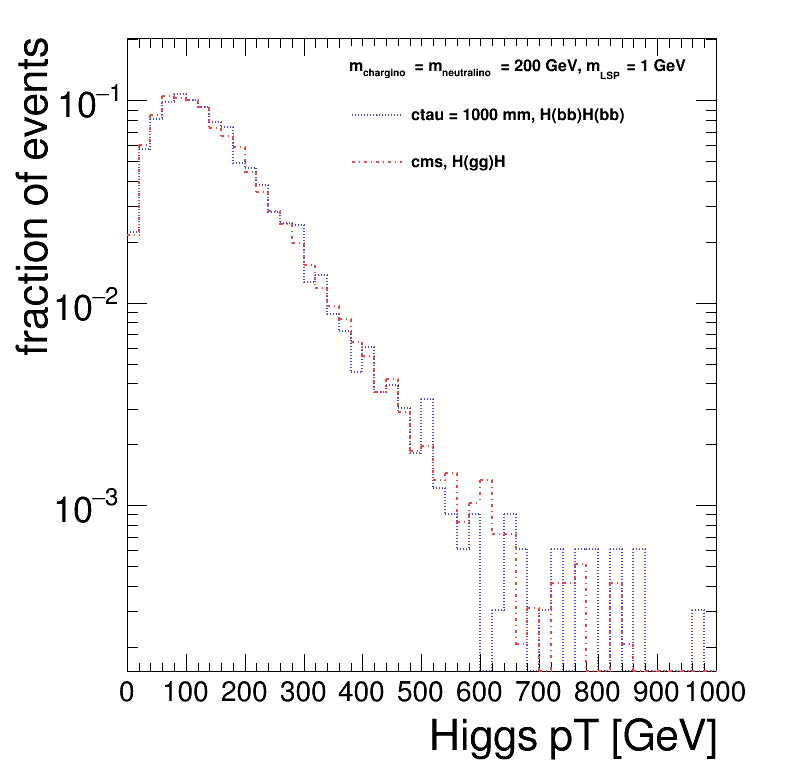

In [5]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.43,0.76,0.78,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0
ht = {}

# print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    

    
    
    if 'cms' in k:
        
        #branches
    
        pid = v['gParticleId'].array()
        status = v['gParticleStatus'].array()
        pt = v['gParticlePt'].array()
        lhe = v['lheComments'].array()

        basic_str = np.logical_and(pid==25, status==22)


        tags = []

        for i,x in enumerate(lhe):
            cfg = str(x, 'utf-8')
            tags.append(cfg)

        tags = np.array(tags)
        
        print(tags[:10])
#         print(np.unique(tags))
    
        # variables
    
        lhe_str = np.logical_and(1,  tags=='TChiHH_HToGG_200')
        cut_str = np.logical_and(lhe_str, basic_str)
    
        h_pt = pt[cut_str]
        
        #plotting

        h_pt_all = h_pt.flatten()

#         print(h_pt_all[:10])
#         print(pt[:10])

        ht[k] = create_TH1D( h_pt_all, axis_title=['Higgs pT [GeV]', 'fraction of events'], name="", binning=[50,-0,1000])
        ht[k].SetLineStyle(styles[k])
        ht[k].SetLineColor(cols[k])
        ht[k].SetMarkerColor(cols[k])

        ht[k].DrawNormalized('same')

        leg.AddEntry(ht[k], texs[k])

        i += 1


    elif 'aod' in k:
        
        #branches
    
        pid = v['gParticleId'].array()
        status = v['gParticleStatus'].array()
        pt = v['gParticlePt'].array()
        lhe = v['lheComments'].array()

        basic_str = np.logical_and(pid==25, status==22)


        tags = []

        for i,x in enumerate(lhe):
            cfg = str(x, 'utf-8')
            tags.append(cfg)

        tags = np.array(tags)
    
#         print(tags[:10])
#         print(pt[:10])
    
        # variables
        
        h_pt = pt[basic_str]
        
        #plotting

        h_pt_all = h_pt.flatten()

#         print(h_pt_all[:10])

        ht[k] = create_TH1D( h_pt_all, axis_title=['Higgs pT [GeV]', 'fraction of events'], name="", binning=[50,-0,1000])
        ht[k].SetLineStyle(styles[k])
        ht[k].SetLineColor(cols[k])
        ht[k].SetMarkerColor(cols[k])
        ht[k].GetXaxis().SetLabelSize(0.04)

        ht[k].DrawNormalized('same')

        leg.AddEntry(ht[k], texs[k])

        i += 1

leg.SetHeader('m_{chargino} = m_{neutralino} = 200 GeV, m_{LSP} = 1 GeV')
leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'lhe_h_pt.png')

ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_HH_200_cms_lhe.root <TTree b'llp' at 0x7f190a67deb8>
['TChiHH_HToGG_200' 'TChiHH_HToGG_200' 'TChiHH_HToGG_200'
 'TChiHH_HToGG_200' 'TChiHH_HToGG_200' 'TChiHH_HToGG_200'
 'TChiHH_HToGG_200' 'TChiHH_HToGG_200' 'TChiHH_HToGG_200'
 'TChiHH_HToGG_200']
[251.83295   124.37348    80.15286    40.08153    41.634815   79.901955
 254.63339   249.50851     5.9808397  52.716713 ]
ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_HH_200_aod_lhe.root <TTree b'llp' at 0x7f190a67de48>
['TChiHH_HToBB_HToBB_200_1000' 'TChiHH_HToBB_HToBB_200_1000'
 'TChiHH_HToBB_HToBB_200_1000' 'TChiHH_HToBB_HToBB_200_1000'
 'TChiHH_HToBB_HToBB_200_1000' 'TChiHH_HToBB_HToBB_200_1000'
 'TChiHH_HToBB_HToBB_200_1000' 'TChiHH_HToBB_HToBB_200_1000'
 'TChiHH_HToBB_HToBB_200_1000' 'TChiHH_HToBB_HToBB_200_1000']
[248.62381  200.5527   124.8898   178.2772   294.53915  276.4817
  27.109201  10.756557  24.758945  21.871262]


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


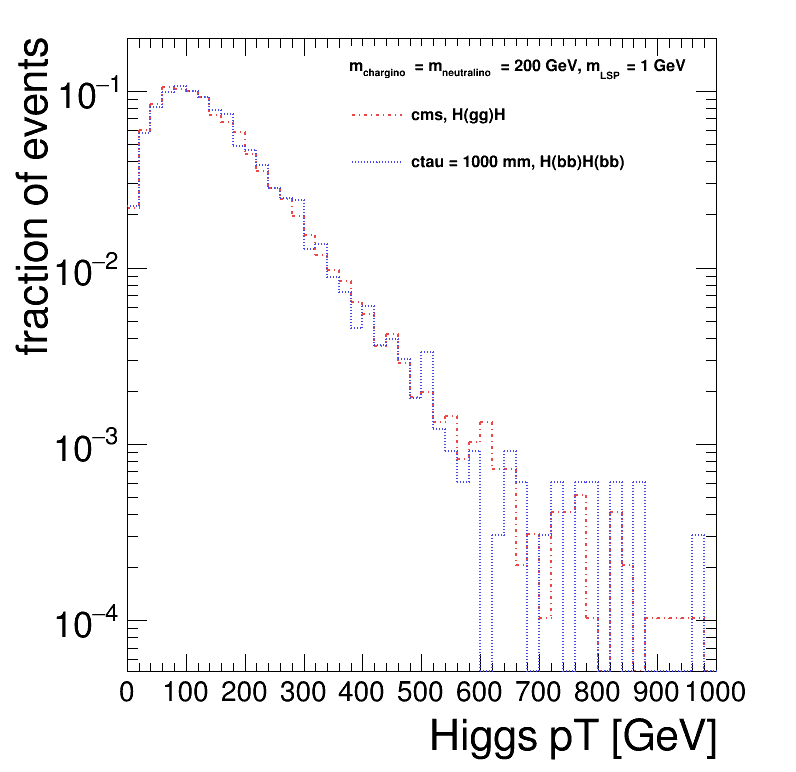

In [5]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.43,0.76,0.78,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0
ht = {}

# print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    #branches

    pid = v['gParticleId'].array()
    status = v['gParticleStatus'].array()
    pt = v['gParticlePt'].array()
    lhe = v['lheComments'].array()

    basic_str = np.logical_and(pid==25, status==22)


    tags = []

    for i,x in enumerate(lhe):
        cfg = str(x, 'utf-8')
        tags.append(cfg)

    tags = np.array(tags)

    print(tags[:10])

    # variables
    
    
    if 'cms' in k:  
    
        lhe_str = np.logical_and(1,  tags=='TChiHH_HToGG_200')
        cut_str = np.logical_and(lhe_str, basic_str)
    
        h_pt = pt[cut_str]


    elif 'aod' in k:
        

        lhe_str = np.logical_and(1,  tags=='TChiHH_HToBB_HToBB_200_1000')
        cut_str = np.logical_and(lhe_str, basic_str)

        h_pt = pt[basic_str]
#         h_pt = pt[cut_str]
        
    #plotting

    h_pt_all = h_pt.flatten()

    print(h_pt_all[:10])

    ht[k] = create_TH1D( h_pt_all, axis_title=['Higgs pT [GeV]', 'fraction of events'], name="", binning=[50,-0,1000])
    ht[k].SetLineStyle(styles[k])
    ht[k].SetLineColor(cols[k])
    ht[k].SetMarkerColor(cols[k])
    ht[k].GetXaxis().SetLabelSize(0.04)

    ht[k].DrawNormalized('same')

    leg.AddEntry(ht[k], texs[k])

    i += 1

leg.SetHeader('m_{chargino} = m_{neutralino} = 200 GeV, m_{LSP} = 1 GeV')
leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
# c.SaveAs(out_dir+'lhe_h_pt.png')

ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_HH_200_cms_lhe.root <TTree b'llp' at 0x7f89f2ad3c18>
['TChiHH_HToGG_200' 'TChiHH_HToGG_200' 'TChiHH_HToGG_200'
 'TChiHH_HToGG_200' 'TChiHH_HToGG_200' 'TChiHH_HToGG_200'
 'TChiHH_HToGG_200' 'TChiHH_HToGG_200' 'TChiHH_HToGG_200'
 'TChiHH_HToGG_200']
0 [251.83295 124.37348] [-2.5257018 -1.9845605] [-0.98291105  1.717903  ] [1588.9116  477.6529]
[251.83295   124.37348    80.15286    40.08153    41.634815   79.901955
 254.63339   249.50851     5.9808397  52.716713 ]
[-2.5257018 -1.9845605  1.9176128 -2.0096965  0.7853584  2.7526717
 -1.9855831  0.376032  -5.4922433 -4.2123375]
[-0.98291105  1.717903   -2.3288426   0.365022   -1.7533062   1.914092
  2.251545   -0.5447776  -0.61828095 -3.1223838 ]
[1588.9116   477.6529   305.3383   196.95924  136.6281   641.45416
  952.99884  295.13556  736.77075 1784.3369 ]
9710
0 251.83295 -2.5257018 -0.98291105 1588.9116
ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_HH_200_aod_lhe.root <TTre

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190927/lhe_h_mass.png has been created


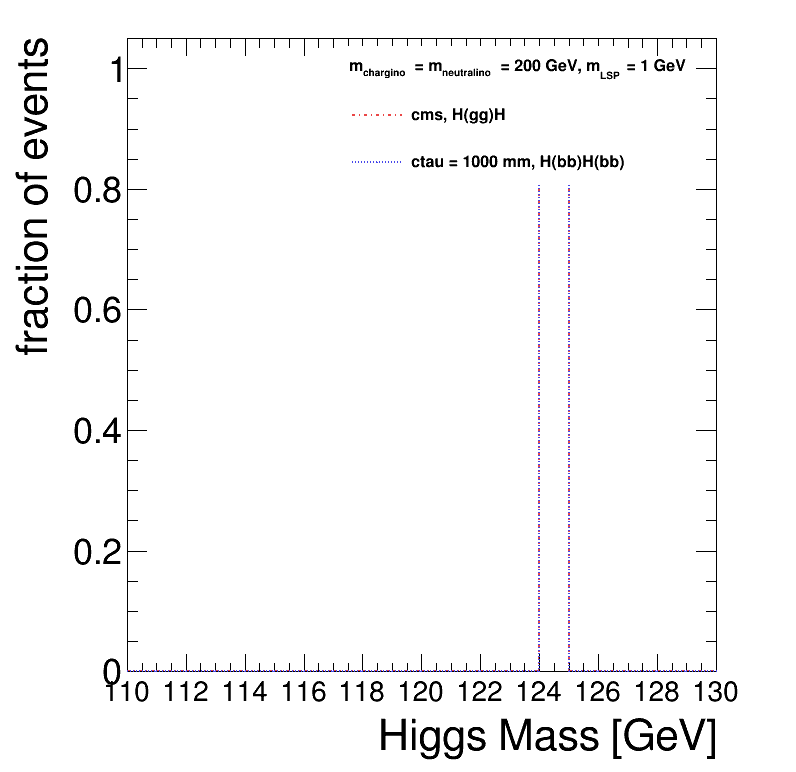

In [12]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.43,0.76,0.78,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0
ht = {}

# print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    #branches

    pid = v['gParticleId'].array()
    status = v['gParticleStatus'].array()
    pt = v['gParticlePt'].array()
    eta = v['gParticleEta'].array()
    phi = v['gParticlePhi'].array()
    e = v['gParticleE'].array()
    lhe = v['lheComments'].array()

    basic_str = np.logical_and(pid==25, status==22)


    tags = []

    for i,x in enumerate(lhe):
        cfg = str(x, 'utf-8')
        tags.append(cfg)

    tags = np.array(tags)

    print(tags[:10])

    # variables
    
    
    if 'cms' in k:  
    
        lhe_str = np.logical_and(1,  tags=='TChiHH_HToGG_200')
        cut_str = np.logical_and(lhe_str, basic_str)
    
        h_pt = pt[cut_str]
        h_eta = eta[cut_str]
        h_phi = phi[cut_str]
        h_e = e[cut_str]


    elif 'aod' in k:
        

        h_pt = pt[basic_str]
        h_eta = eta[basic_str]
        h_phi = phi[basic_str]
        h_e = e[basic_str]
        
    #plotting

    h_pt_all = h_pt.flatten()
    h_eta_all = h_eta.flatten()
    h_phi_all = h_phi.flatten()
    h_e_all = h_e.flatten()
    print(0,h_pt[0],h_eta[0],h_phi[0],h_e[0])
    print(h_pt_all[:10])
    print(h_eta_all[:10])
    print(h_phi_all[:10])
    print(h_e_all[:10])
    print(len(h_pt_all))

    h_mass_all = []
    
    for index in range(0,len(h_pt_all)):
#         print(i)
        
        tmp_p4_h    = rt.TLorentzVector()
        tmp_p4_h.SetPtEtaPhiE(h_pt_all[index], h_eta_all[index], h_phi_all[index], h_e_all[index])
        print(index,h_pt_all[index],h_eta_all[index],h_phi_all[index],h_e_all[index])

        tmp_mass = tmp_p4_h.M()
        
        h_mass_all.append(tmp_mass)
        
        if i>10:
            break
    
#     h_mass_all = h_mass.flatten()

#     print(h_pt_all[:10])

    ht[k] = create_TH1D( h_mass_all, axis_title=['Higgs Mass [GeV]', 'fraction of events'], name="", binning=[20,110,130])
    ht[k].SetLineStyle(styles[k])
    ht[k].SetLineColor(cols[k])
    ht[k].SetMarkerColor(cols[k])
    ht[k].GetXaxis().SetLabelSize(0.04)

    ht[k].DrawNormalized('same')

    leg.AddEntry(ht[k], texs[k])

    i += 1

leg.SetHeader('m_{chargino} = m_{neutralino} = 200 GeV, m_{LSP} = 1 GeV')
leg.Draw()

# c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'lhe_h_mass.png')

# LHE Comments --- MET

ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_HH_200_cms_lhe.root <TTree b'llp' at 0x7f89f2ad3c18>
ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_HH_200_aod_lhe.root <TTree b'llp' at 0x7f89f0abaf60>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190927/met.png has been created


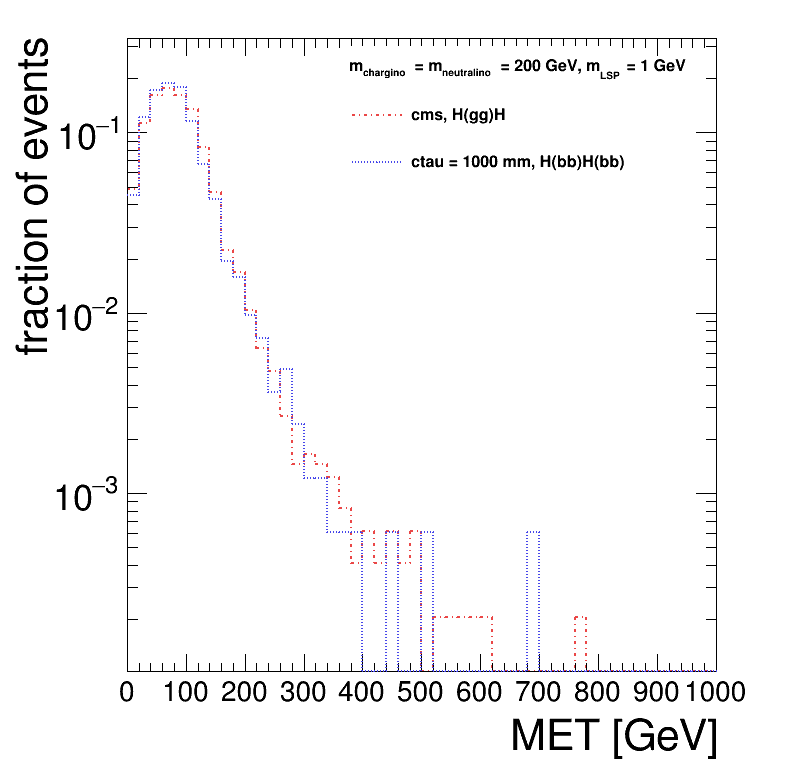

In [13]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.43,0.76,0.78,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0
ht = {}

# print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    #branches
    
    pid = v['gParticleId'].array()
    status = v['gParticleStatus'].array()
    pt = v['gParticlePt'].array()
    lhe = v['lheComments'].array()
    met = v['genMetPtCalo'].array()
    

    tags = []
    
    for i,x in enumerate(lhe):
        cfg = str(x, 'utf-8')
        tags.append(cfg)
        
    tags = np.array(tags)
    
    # variables
    
    if 'cms' in k:
    
        lhe_str = np.logical_and(1,  tags=='TChiHH_HToGG_200')
    
        met = met[lhe_str]

        
    #plotting


    ht[k] = create_TH1D( met, axis_title=['MET [GeV]', 'fraction of events'], name="", binning=[50,-0,1000])
    ht[k].SetLineStyle(styles[k])
    ht[k].SetLineColor(cols[k])
    ht[k].SetMarkerColor(cols[k])
    ht[k].GetXaxis().SetLabelSize(0.04)

    ht[k].DrawNormalized('same')

    leg.AddEntry(ht[k], texs[k])

    i += 1

leg.SetHeader('m_{chargino} = m_{neutralino} = 200 GeV, m_{LSP} = 1 GeV')
leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'met.png')

# LHE Comments --- N2  N1 Pt

ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_HH_200_cms_lhe.root <TTree b'llp' at 0x7f89f2ad3c18>
['TChiHH_HToGG_200' 'TChiHH_HToGG_200' 'TChiHH_HToGG_200'
 'TChiHH_HToGG_200' 'TChiHH_HToGG_200' 'TChiHH_HToGG_200'
 'TChiHH_HToGG_200' 'TChiHH_HToGG_200' 'TChiHH_HToGG_200'
 'TChiHH_HToGG_200']
[308.52228  105.245674  39.047604 272.7341    18.130966 454.80676
 133.18279  188.46938   39.390102 303.96082 ]
ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_HH_200_aod_lhe.root <TTree b'llp' at 0x7f89f0abaf60>
['TChiHH_HToBB_HToBB_200_1000' 'TChiHH_HToBB_HToBB_200_1000'
 'TChiHH_HToBB_HToBB_200_1000' 'TChiHH_HToBB_HToBB_200_1000'
 'TChiHH_HToBB_HToBB_200_1000' 'TChiHH_HToBB_HToBB_200_1000'
 'TChiHH_HToBB_HToBB_200_1000' 'TChiHH_HToBB_HToBB_200_1000'
 'TChiHH_HToBB_HToBB_200_1000' 'TChiHH_HToBB_HToBB_200_1000']
[303.38876  211.55273  372.4074    55.624943  62.107483  83.04263
  46.979736 246.71127  150.80687  104.54235 ]


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190927/lhe_n2_pt.png has been created


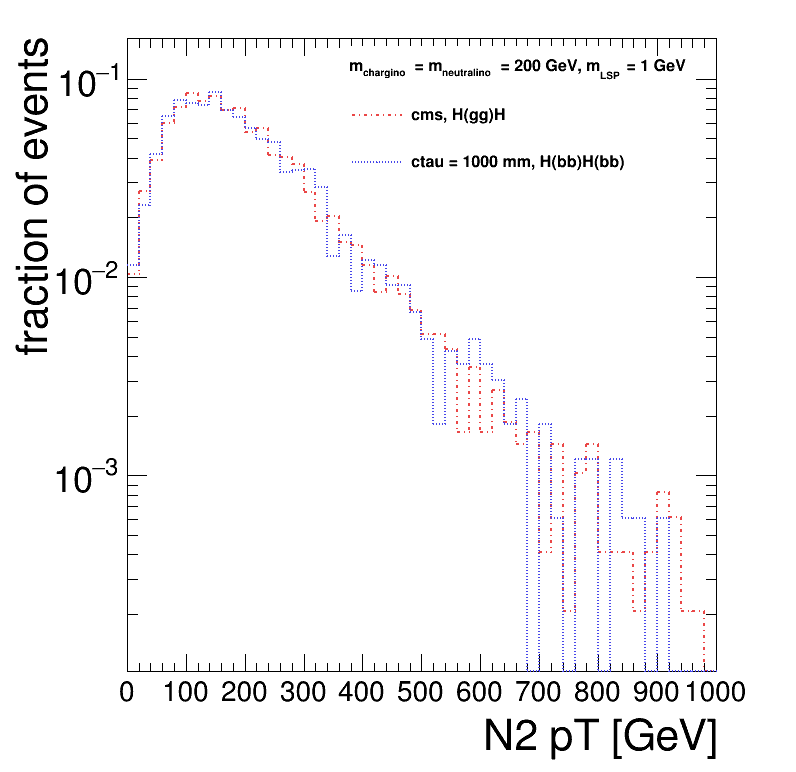

In [14]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.43,0.76,0.78,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0
ht = {}

# print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    #branches

    pid = v['gParticleId'].array()
    status = v['gParticleStatus'].array()
    pt = v['gParticlePt'].array()
    lhe = v['lheComments'].array()

    basic_str = np.logical_and(pid==1000023, status==22)


    tags = []

    for i,x in enumerate(lhe):
        cfg = str(x, 'utf-8')
        tags.append(cfg)

    tags = np.array(tags)

    print(tags[:10])

    # variables
    
    
    if 'cms' in k:  
    
        lhe_str = np.logical_and(1,  tags=='TChiHH_HToGG_200')

        cut_str = np.logical_and(lhe_str, basic_str)
    
        h_pt = pt[cut_str]


    elif 'aod' in k:
        

        h_pt = pt[basic_str]
        
    #plotting

    h_pt_all = h_pt.flatten()

    print(h_pt_all[:10])

    ht[k] = create_TH1D( h_pt_all, axis_title=['N2 pT [GeV]', 'fraction of events'], name="", binning=[50,-0,1000])
    ht[k].SetLineStyle(styles[k])
    ht[k].SetLineColor(cols[k])
    ht[k].SetMarkerColor(cols[k])
    ht[k].GetXaxis().SetLabelSize(0.04)

    ht[k].DrawNormalized('same')

    leg.AddEntry(ht[k], texs[k])

    i += 1
    
leg.SetHeader('m_{chargino} = m_{neutralino} = 200 GeV, m_{LSP} = 1 GeV')
leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'lhe_n2_pt.png')

ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_HH_200_cms_lhe.root <TTree b'llp' at 0x7f89f2ad3c18>
['TChiHH_HToGG_200' 'TChiHH_HToGG_200' 'TChiHH_HToGG_200'
 'TChiHH_HToGG_200' 'TChiHH_HToGG_200' 'TChiHH_HToGG_200'
 'TChiHH_HToGG_200' 'TChiHH_HToGG_200' 'TChiHH_HToGG_200'
 'TChiHH_HToGG_200']
[ 71.48352   14.771617  21.326345  55.271534  16.879494 183.62134
  52.17071  139.18936   40.370956 220.10472 ]
[  1.8792106   2.3935025   2.435678  ... 511.57587   545.6081
 667.72754  ]
ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_HH_200_aod_lhe.root <TTree b'llp' at 0x7f89f0abaf60>
['TChiHH_HToBB_HToBB_200_1000' 'TChiHH_HToBB_HToBB_200_1000'
 'TChiHH_HToBB_HToBB_200_1000' 'TChiHH_HToBB_HToBB_200_1000'
 'TChiHH_HToBB_HToBB_200_1000' 'TChiHH_HToBB_HToBB_200_1000'
 'TChiHH_HToBB_HToBB_200_1000' 'TChiHH_HToBB_HToBB_200_1000'
 'TChiHH_HToBB_HToBB_200_1000' 'TChiHH_HToBB_HToBB_200_1000']
[40.282993 81.380875 85.02722  75.28516  78.9538   49.526985 62.106503
 93.8728   79.3051   4

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190927/lhe_n1_from_n2_pt.png has been created


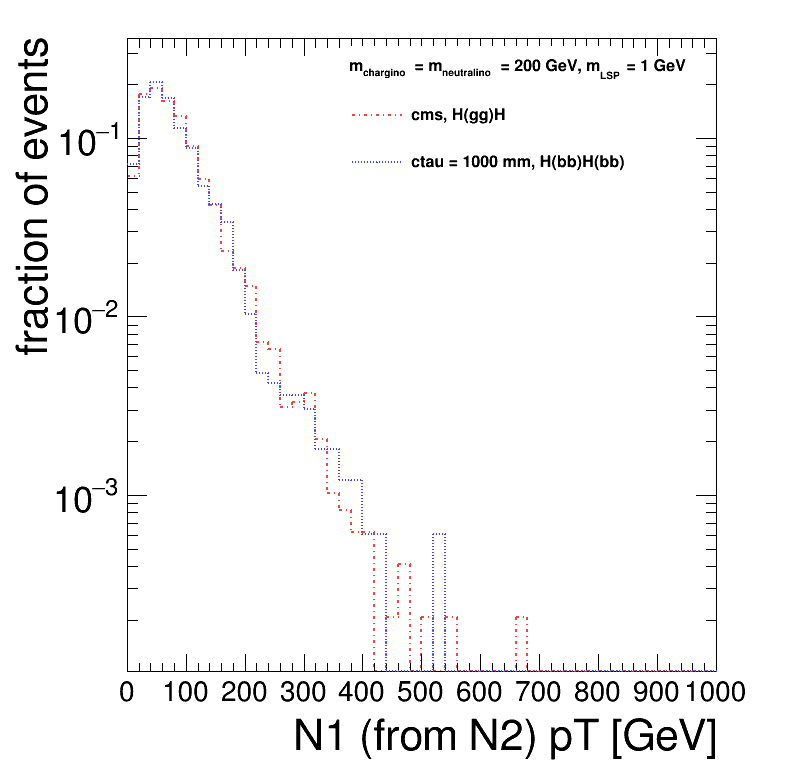

In [15]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.43,0.76,0.78,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0
ht = {}

# print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    #branches

    pid = v['gParticleId'].array()
    mid = v['gParticleMotherId'].array()
    status = v['gParticleStatus'].array()
    pt = v['gParticlePt'].array()
    lhe = v['lheComments'].array()

    basic_str = np.logical_and(pid==1000022, mid==1000023)


    tags = []

    for i,x in enumerate(lhe):
        cfg = str(x, 'utf-8')
        tags.append(cfg)

    tags = np.array(tags)

    print(tags[:10])

    # variables
    
    
    if 'cms' in k:  
    
        lhe_str = np.logical_and(1,  tags=='TChiHH_HToGG_200')

        cut_str = np.logical_and(lhe_str, basic_str)
    
        h_pt = pt[cut_str]


    elif 'aod' in k:
        

        h_pt = pt[basic_str]
        
    #plotting

    h_pt_all = h_pt.flatten()

    print(h_pt_all[:10])
    print(np.unique(h_pt_all))

    ht[k] = create_TH1D( h_pt_all, axis_title=['N1 (from N2) pT [GeV]', 'fraction of events'], name="", binning=[50,-0,1000])
    ht[k].SetLineStyle(styles[k])
    ht[k].SetLineColor(cols[k])
    ht[k].SetMarkerColor(cols[k])
    ht[k].GetXaxis().SetLabelSize(0.04)

    ht[k].DrawNormalized('same')

    leg.AddEntry(ht[k], texs[k])

    i += 1

leg.SetHeader('m_{chargino} = m_{neutralino} = 200 GeV, m_{LSP} = 1 GeV')
leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'lhe_n1_from_n2_pt.png')

ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_HH_200_cms_lhe.root <TTree b'llp' at 0x7f89f2ad3c18>
[190.56525   83.61285   31.238508  45.139763  63.30339   56.274075
  93.41024   32.962112  64.835556  45.463062]
[6.8270516e-01 2.1095512e+00 2.3130682e+00 ... 5.5299524e+02 6.3283337e+02
 7.7299475e+02]
ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_HH_200_aod_lhe.root <TTree b'llp' at 0x7f89f0abaf60>
[ 21.576334  45.029392  95.85377   64.50088   58.95375   65.48813
  61.731045 132.40411   60.893253  35.706757]
[2.8498900e-01 9.2792851e-01 2.8367877e+00 ... 6.0136530e+02 6.7829889e+02
 7.4203284e+02]


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190927/lhe_n1_from_n3_pt.png has been created


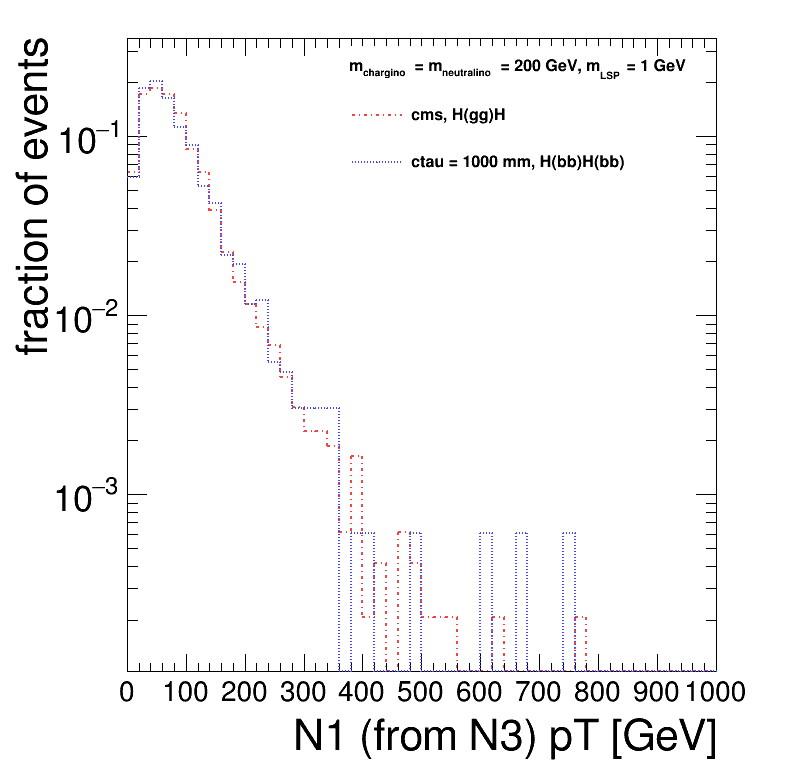

In [16]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.43,0.76,0.78,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0
ht = {}

# print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    #branches

    pid = v['gParticleId'].array()
    mid = v['gParticleMotherId'].array()
    status = v['gParticleStatus'].array()
    pt = v['gParticlePt'].array()
    lhe = v['lheComments'].array()

    basic_str = np.logical_and(pid==1000022, mid==1000025)


    tags = []

    for i,x in enumerate(lhe):
        cfg = str(x, 'utf-8')
        tags.append(cfg)

    tags = np.array(tags)

#     print(tags[:10])

    # variables
    
    
    if 'cms' in k:  
    
        lhe_str = np.logical_and(1,  tags=='TChiHH_HToGG_200')

        cut_str = np.logical_and(lhe_str, basic_str)
    
        h_pt = pt[cut_str]


    elif 'aod' in k:
        

        h_pt = pt[basic_str]
        
    #plotting

    h_pt_all = h_pt.flatten()

    print(h_pt_all[:10])
    print(np.unique(h_pt_all))

    ht[k] = create_TH1D( h_pt_all, axis_title=['N1 (from N3) pT [GeV]', 'fraction of events'], name="", binning=[50,-0,1000])
    ht[k].SetLineStyle(styles[k])
    ht[k].SetLineColor(cols[k])
    ht[k].SetMarkerColor(cols[k])
    ht[k].GetXaxis().SetLabelSize(0.04)

    ht[k].DrawNormalized('same')

    leg.AddEntry(ht[k], texs[k])

    i += 1

leg.SetHeader('m_{chargino} = m_{neutralino} = 200 GeV, m_{LSP} = 1 GeV')
leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'lhe_n1_from_n3_pt.png')

# b quark Pt

ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_HH_200_cms_lhe.root <TTree b'llp' at 0x7f89f2ad3c18>
[ 25.74319  236.00433   47.051483  81.54973   71.57208   27.725225
  75.48417   70.61869  144.02953   50.16759 ]
[6.5432483e-01 7.8834689e-01 1.9518267e+00 ... 7.4321259e+02 7.5359241e+02
 1.1160659e+03]
ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_HH_200_aod_lhe.root <TTree b'llp' at 0x7f89f0abaf60>
[129.78262  139.46098  207.1732    34.992672  80.956345  44.45329
 107.44063  109.02187  155.59436  148.38922 ]
[1.1601970e+00 1.3484515e+00 1.6391000e+00 ... 7.1703125e+02 7.8617877e+02
 1.3688677e+03]


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190927/lhe_b_pt.png has been created


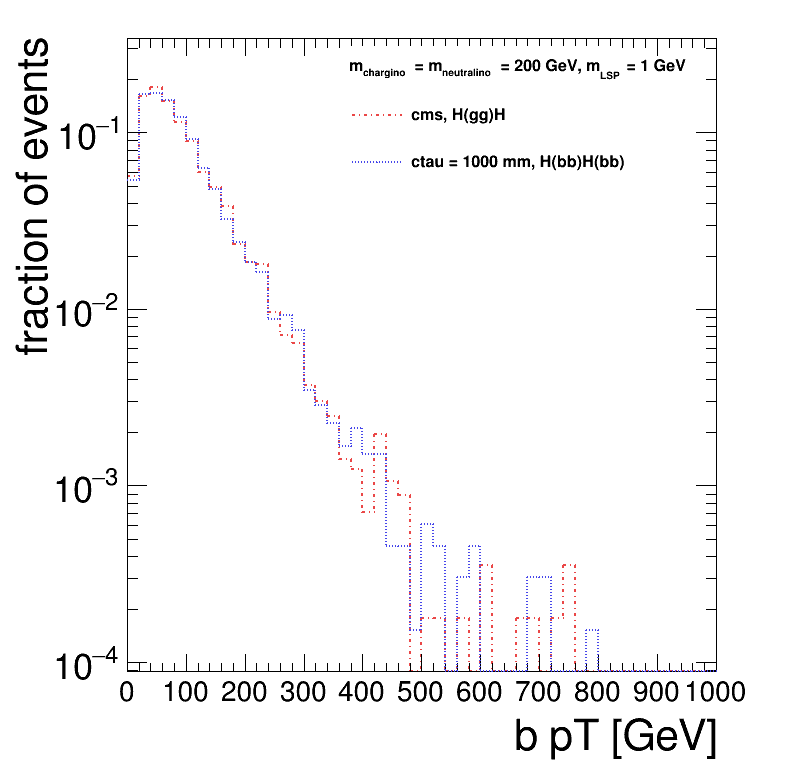

In [17]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.43,0.76,0.78,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0
ht = {}

# print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    #branches

    pid = v['gParticleId'].array()
    mid = v['gParticleMotherId'].array()
    status = v['gParticleStatus'].array()
    pt = v['gParticlePt'].array()
    lhe = v['lheComments'].array()

    basic_str = np.logical_and(abs(pid)==5, status==23)


    tags = []

    for i,x in enumerate(lhe):
        cfg = str(x, 'utf-8')
        tags.append(cfg)

    tags = np.array(tags)

#     print(tags[:10])

    # variables
    
    
    if 'cms' in k:  
    
        lhe_str = np.logical_and(1,  tags=='TChiHH_HToGG_200')

        cut_str = np.logical_and(lhe_str, basic_str)
    
        h_pt = pt[cut_str]


    elif 'aod' in k:
        

        h_pt = pt[basic_str]
        
    #plotting

    h_pt_all = h_pt.flatten()

    print(h_pt_all[:10])
    print(np.unique(h_pt_all))

    ht[k] = create_TH1D( h_pt_all, axis_title=['b pT [GeV]', 'fraction of events'], name="", binning=[50,-0,1000])
    ht[k].SetLineStyle(styles[k])
    ht[k].SetLineColor(cols[k])
    ht[k].SetMarkerColor(cols[k])
    ht[k].GetXaxis().SetLabelSize(0.04)

    ht[k].DrawNormalized('same')

    leg.AddEntry(ht[k], texs[k])

    i += 1

leg.SetHeader('m_{chargino} = m_{neutralino} = 200 GeV, m_{LSP} = 1 GeV')
leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'lhe_b_pt.png')

# lepton Pt

ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_HH_200_cms_lhe.root <TTree b'llp' at 0x7f89f2ad3c18>
[1.4629713e+01 3.3277377e-02 1.0848234e-01 3.6748594e-01 3.8869357e-01
 2.0541255e+00 2.6746948e+00 8.5539514e-01 7.8795617e-03 7.2362371e-02]
[1.5977619e-04 1.7958808e-04 2.2151641e-04 ... 3.1054340e+02 3.1228439e+02
 3.5027673e+02]
ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_HH_200_aod_lhe.root <TTree b'llp' at 0x7f89f0abaf60>
[1.32122545e+01 2.61436582e-01 5.33629395e-03 1.93380337e+01
 1.06416956e-01 3.21148001e-02 5.65768369e-02 6.26837909e-02
 4.63686991e+00 3.62458839e+01]
[2.1396154e-04 4.4194469e-04 4.4321854e-04 ... 2.1280276e+02 2.3306850e+02
 2.7886737e+02]


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190927/lhe_lepton_pt.png has been created


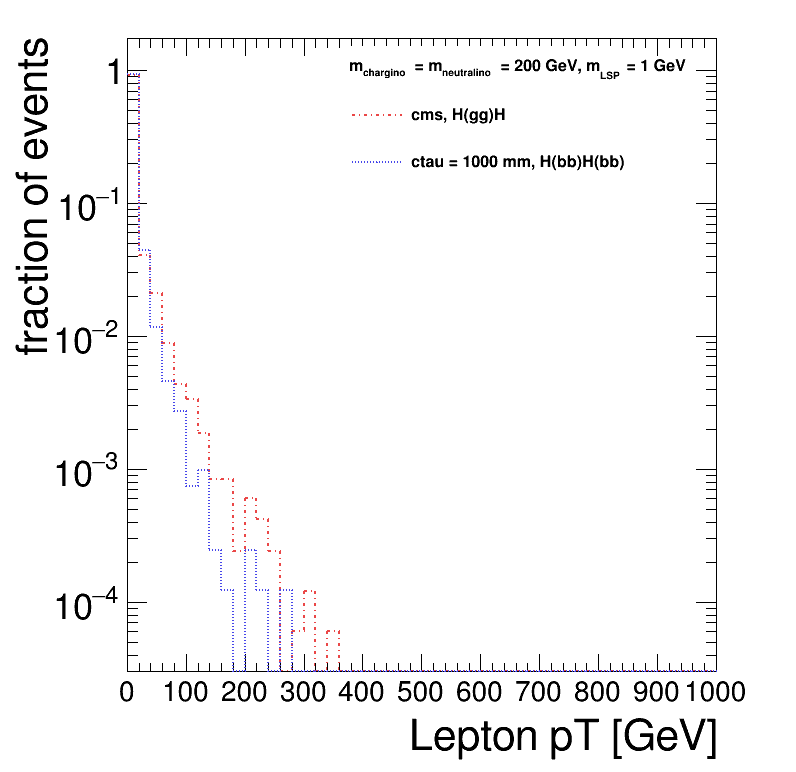

In [18]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.43,0.76,0.78,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0
ht = {}

# print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    #branches

    pid = v['gParticleId'].array()
    mid = v['gParticleMotherId'].array()
    status = v['gParticleStatus'].array()
    pt = v['gParticlePt'].array()
    lhe = v['lheComments'].array()

    pid_str = np.logical_or(abs(pid)==11, abs(pid)==13)
    basic_str = np.logical_and(pid_str, 1)


    tags = []

    for i,x in enumerate(lhe):
        cfg = str(x, 'utf-8')
        tags.append(cfg)

    tags = np.array(tags)

#     print(tags[:10])

    # variables
    
    
    if 'cms' in k:  
    
        lhe_str = np.logical_and(1,  tags=='TChiHH_HToGG_200')

        cut_str = np.logical_and(lhe_str, basic_str)
    
        h_pt = pt[cut_str]


    elif 'aod' in k:
        

        h_pt = pt[basic_str]
        
    #plotting

    h_pt_all = h_pt.flatten()

    print(h_pt_all[:10])
    print(np.unique(h_pt_all))

    ht[k] = create_TH1D( h_pt_all, axis_title=['Lepton pT [GeV]', 'fraction of events'], name="", binning=[50,-0,1000])
    ht[k].SetLineStyle(styles[k])
    ht[k].SetLineColor(cols[k])
    ht[k].SetMarkerColor(cols[k])
    ht[k].GetXaxis().SetLabelSize(0.04)

    ht[k].DrawNormalized('same')

    leg.AddEntry(ht[k], texs[k])

    i += 1

leg.SetHeader('m_{chargino} = m_{neutralino} = 200 GeV, m_{LSP} = 1 GeV')
leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'lhe_lepton_pt.png')

# ctau

ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_HH_200_cms_lhe.root <TTree b'llp' at 0x7f89f2ad3c18>
ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_HH_200_aod_lhe.root <TTree b'llp' at 0x7f89f0abaf60>
 FCN=58.8719 FROM MIGRAD    STATUS=CONVERGED      53 CALLS          54 TOTAL
                     EDM=2.29261e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     5.08356e+00   3.55523e-02   9.47450e-05   1.57540e-02
   2  Slope       -1.00629e-02   2.61762e-04   6.97088e-07  -5.84105e-01


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190927/decay_ctau_beta.png has been created


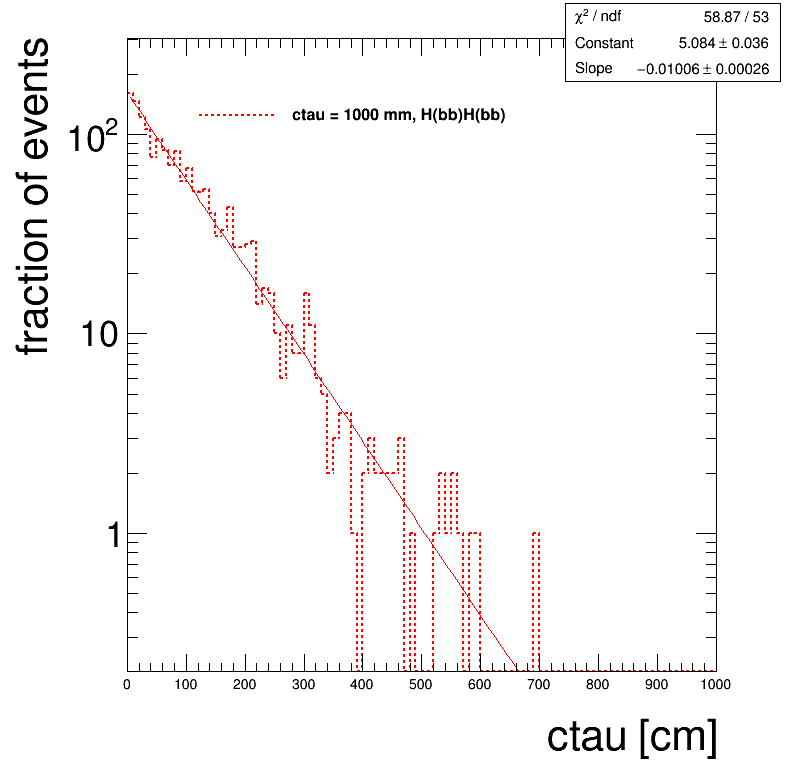

In [19]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.23,0.76,0.78,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetFillStyle(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0
ht = {}
hy = {}
hz = {}
hct = {}

 

for k,v in tree.items(): 
    print(k,v)
    
 
 
    if 'aod' in k:
    
 
        
        beta = v['gLLP_beta'].array()
 
        decay_x = v['gLLP_decay_vertex_x'].array()
        decay_y = v['gLLP_decay_vertex_y'].array()
        decay_z = v['gLLP_decay_vertex_z'].array()

#         h_x_all = decay_x.flatten()
#         h_y_all = decay_y.flatten()
#         h_z_all = decay_z.flatten()
        
#         h_beta_all = beta.flatten()
        h_x_all = decay_x[:,0]
        h_y_all = decay_y[:,0]
        h_z_all = decay_z[:,0]
        
        h_beta_all = beta[:,0]

        h_r_all = [rt.TMath.Sqrt(pow(x,2)+pow(y,2)) for x,y in zip(h_x_all, h_y_all)]
        h_d_all = [rt.TMath.Sqrt(pow(x,2)+pow(y,2)) for x,y in zip(h_r_all, h_z_all)]
        
        out_h_ct_flat = [x/y*(rt.TMath.Sqrt(1-pow(y ,2))) for x,y in zip(h_d_all, h_beta_all)]
        
    

        hct[k] = create_TH1D( out_h_ct_flat, axis_title=['ctau [cm]', 'fraction of events'], name="", binning=[100,-0,1000])
        hct[k].SetLineStyle(i+2)
        hct[k].SetLineColor(i+2)
#         hct[k].SetMarkerColor(cols[k])
        hct[k].GetXaxis().SetLabelSize(0.02)

        hct[k].Draw('same')
#         hct[k].DrawNormalized('same')
        hct[k].Fit('expo')
#         hct[k].Fit('expo','','',10,20000)
 

      

        leg.AddEntry(hct[k], texs[k])
        
 
 
        i += 1
    

# leg.SetHeader('m_{chargino} = m_{neutralino} = 127 GeV, m_{LSP} = 1 GeV')
leg.Draw()

c.SetLogy()
# c.SetLogx()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'decay_ctau_beta.png')

ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_HH_200_cms_lhe.root <TTree b'llp' at 0x7f89f2ad3c18>
ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_HH_200_aod_lhe.root <TTree b'llp' at 0x7f89f0abaf60>
 FCN=416.468 FROM MIGRAD    STATUS=CONVERGED     123 CALLS         124 TOTAL
                     EDM=1.21618e-11    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.34542e+01   9.57002e-03   2.86157e-05   1.58908e-03
   2  Slope       -3.55052e-01   1.72394e-03   5.15482e-06   7.32305e-03


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190927/decay_ctau_prompt.png has been created


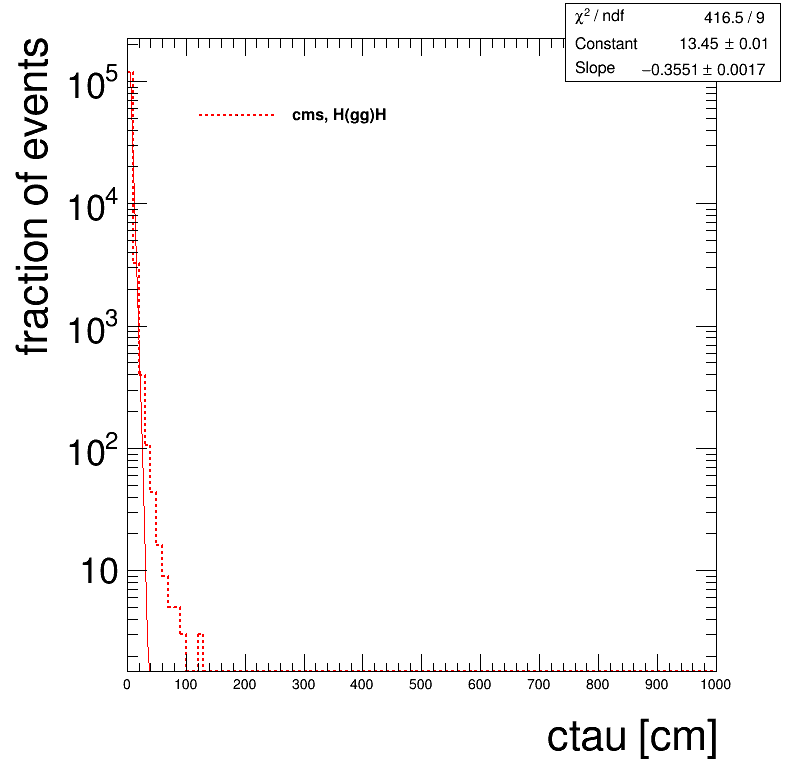

In [20]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.23,0.76,0.78,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetFillStyle(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0
ht = {}
hy = {}
hz = {}
hct = {}

 

for k,v in tree.items(): 
    print(k,v)
    
 
 
    if 'cms' in k:
    
 
        
        beta = v['gLLP_beta'].array()
 
        decay_x = v['gLLP_decay_vertex_x'].array()
        decay_y = v['gLLP_decay_vertex_y'].array()
        decay_z = v['gLLP_decay_vertex_z'].array()

#         h_x_all = decay_x.flatten()
#         h_y_all = decay_y.flatten()
#         h_z_all = decay_z.flatten()
        
#         h_beta_all = beta.flatten()
        h_x_all = decay_x[:,0]
        h_y_all = decay_y[:,0]
        h_z_all = decay_z[:,0]
        
        h_beta_all = beta[:,0]

        h_r_all = [rt.TMath.Sqrt(pow(x,2)+pow(y,2)) for x,y in zip(h_x_all, h_y_all)]
        h_d_all = [rt.TMath.Sqrt(pow(x,2)+pow(y,2)) for x,y in zip(h_r_all, h_z_all)]
        
        out_h_ct_flat = [x/y*(rt.TMath.Sqrt(1-pow(y ,2))) for x,y in zip(h_d_all, h_beta_all)]
        
    

        hct[k] = create_TH1D( out_h_ct_flat, axis_title=['ctau [cm]', 'fraction of events'], name="", binning=[100,-0,1000])
        hct[k].SetLineStyle(i+2)
        hct[k].SetLineColor(i+2)
#         hct[k].SetMarkerColor(cols[k])
        hct[k].GetXaxis().SetLabelSize(0.02)

        hct[k].Draw('same')
#         hct[k].DrawNormalized('same')
        hct[k].Fit('expo')
#         hct[k].Fit('expo','','',10,20000)
 

      

        leg.AddEntry(hct[k], texs[k])
        
 
 
        i += 1
    

# leg.SetHeader('m_{chargino} = m_{neutralino} = 127 GeV, m_{LSP} = 1 GeV')
leg.Draw()

c.SetLogy()
# c.SetLogx()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'decay_ctau_prompt.png')

# GEN time

ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_HH_200_cms_lhe.root <TTree b'llp' at 0x7f89f2ad3c18>
ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_HH_200_aod_lhe.root <TTree b'llp' at 0x7f89f0abaf60>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190927/gen_time.png has been created


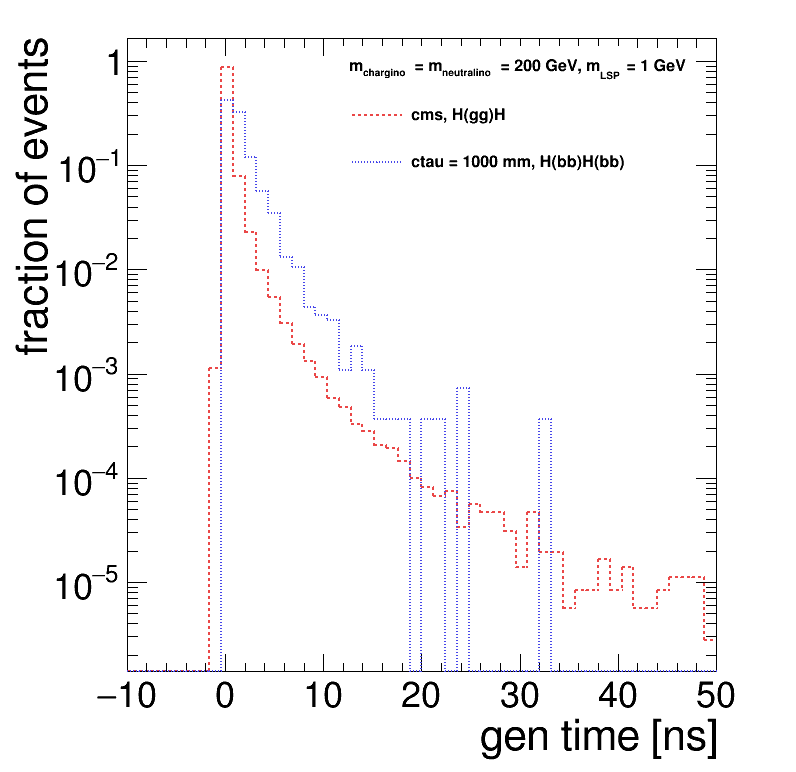

In [21]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.43,0.76,0.78,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0
ht = {}

 

for k,v in tree.items(): 
    print(k,v)
    
    if 'root' in k:
    
        t = v['gen_time'].array()
 

        t_all = t.flatten()
    
#         print(t_all[0:100])

        ht[k] = create_TH1D( t_all, axis_title=['gen time [ns]', 'fraction of events'], name="", binning=[50,-10,50])
        ht[k].SetLineStyle(i+2)
        ht[k].SetLineColor(cols[k])
        ht[k].SetMarkerColor(cols[k])

#         ht[k].Draw('same')
        ht[k].DrawNormalized('same')
        ht[k].SetMinimum(0)
        ht[k].SetMaximum(1e+5)

        leg.AddEntry(ht[k], texs[k])
 
        i += 1
    

leg.SetHeader('m_{chargino} = m_{neutralino} = 200 GeV, m_{LSP} = 1 GeV')
leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'gen_time.png')

ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_HH_200_aod_lhe.root <TTree b'llp' at 0x7f805fac8278>
ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_HH_200_cms_lhe.root <TTree b'llp' at 0x7f805f9af9e8>
[b'TChiHH_HToGG_200' b'TChiHH_HToGG_200' b'TChiHH_HToGG_200' ... b'TChiHH_HToGG_200' b'TChiHH_HToGG_200' b'TChiHH_HToGG_200']


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190927/gen_time_cms.png has been created


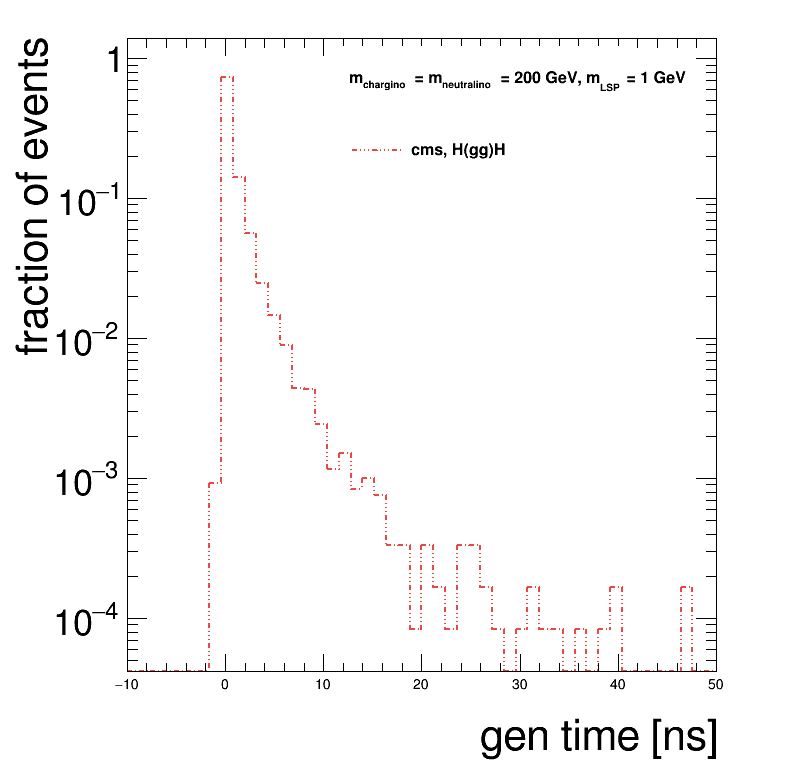

In [8]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.43,0.76,0.78,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0
ht = {}

 

for k,v in tree.items(): 
    print(k,v)
    
    #branches

    pid = v['gParticleId'].array()
    mid = v['gParticleMotherId'].array()
    status = v['gParticleStatus'].array()
    t = v['gen_time'].array()
    pt = v['gParticlePt'].array()
    lhe = v['lheComments'].array()


    tags = []

    for i,x in enumerate(lhe):
        cfg = str(x, 'utf-8')
        tags.append(cfg)

    tags = np.array(tags)

#     print(tags[:10])

    # variables
    
    
    if 'cms' in k:  
    
        lhe_str = np.logical_and(1,  tags=='TChiHH_HToGG_200')
    
        t_all = t[lhe_str]
        lhe_all = lhe[lhe_str]
        
        print(lhe_all[:10])


#     elif 'aod' in k:
        

#         t_all = t
        
    
 

        t_all_flat = t_all.flatten()

    #         print(t_all[0:100])

        ht[k] = create_TH1D( t_all_flat, axis_title=['gen time [ns]', 'fraction of events'], name="", binning=[50,-10,50])
        ht[k].SetLineStyle(styles[k]+2)
        ht[k].SetLineColor(cols[k])
        ht[k].SetMarkerColor(cols[k])
        ht[k].GetXaxis().SetLabelSize(0.02)
        ht[k].GetYaxis().SetLabelSize(0.05)
    #     ht[k].Scale(1./ht[k].GetEntries())
    #     ht[k].GetYaxis().SetRangeUser(0,1)

    #     ht[k].SetMaximum(1)
    #     ht[k].Draw('same')
        ht[k].DrawNormalized('same')
        ht[k].SetMinimum(0)

        leg.AddEntry(ht[k], texs[k])

        i += 1
    

leg.SetHeader('m_{chargino} = m_{neutralino} = 200 GeV, m_{LSP} = 1 GeV')
leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'gen_time_cms.png')

ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_HH_200_aod_lhe.root <TTree b'llp' at 0x7f805fac8278>
ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_HH_200_cms_lhe.root <TTree b'llp' at 0x7f805f9af9e8>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190927/gen_time_200.png has been created


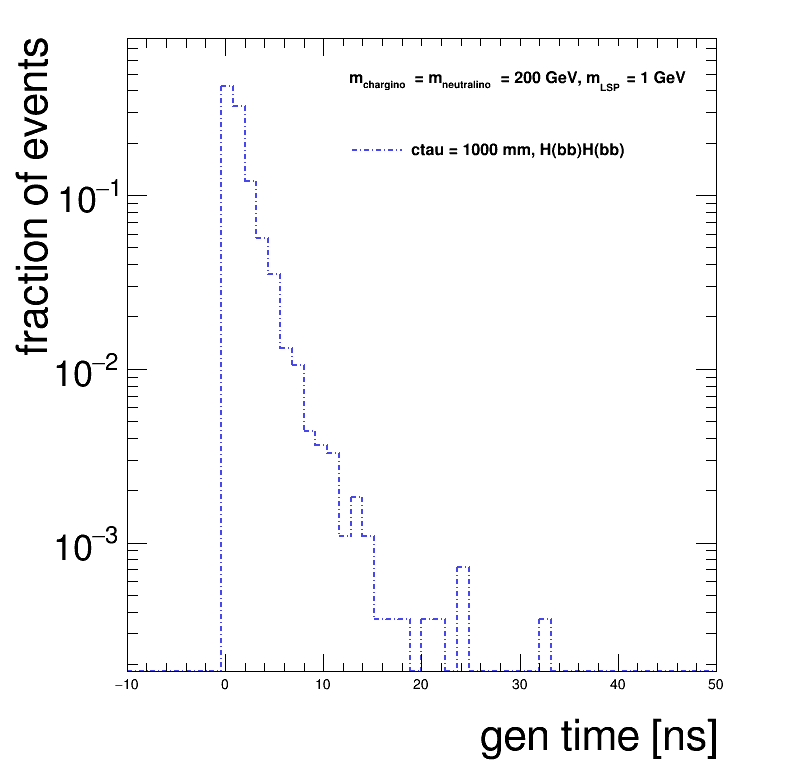

In [9]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.43,0.76,0.78,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0
ht = {}

 

for k,v in tree.items(): 
    print(k,v)
    
    #branches

    pid = v['gParticleId'].array()
    mid = v['gParticleMotherId'].array()
    status = v['gParticleStatus'].array()
    t = v['gen_time'].array()
    pt = v['gParticlePt'].array()
    lhe = v['lheComments'].array()


    tags = []

    for i,x in enumerate(lhe):
        cfg = str(x, 'utf-8')
        tags.append(cfg)

    tags = np.array(tags)

#     print(tags[:10])

    # variables
    
    
 
    if 'aod' in k:
        

        t_all = t
        
    
 

        t_all_flat = t_all.flatten()

    #         print(t_all[0:100])

        ht[k] = create_TH1D( t_all_flat, axis_title=['gen time [ns]', 'fraction of events'], name="", binning=[50,-10,50])
        ht[k].SetLineStyle(styles[k]+2)
        ht[k].SetLineColor(cols[k])
        ht[k].SetMarkerColor(cols[k])
        ht[k].GetXaxis().SetLabelSize(0.02)
        ht[k].GetYaxis().SetLabelSize(0.05)
    #     ht[k].Scale(1./ht[k].GetEntries())
    #     ht[k].GetYaxis().SetRangeUser(0,1)

    #     ht[k].SetMaximum(1)
    #     ht[k].Draw('same')
        ht[k].DrawNormalized('same')
        ht[k].SetMinimum(0)

        leg.AddEntry(ht[k], texs[k])

        i += 1
    

leg.SetHeader('m_{chargino} = m_{neutralino} = 200 GeV, m_{LSP} = 1 GeV')
leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'gen_time_200.png')